<a href="https://colab.research.google.com/github/miki42v/Fake-Profile-Detection-for-Instagram/blob/main/FAKE_PROFILE_DETECTION_MODEL_3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IMPORT LIBRARIES

In [ ]:
import pandas as pd                                                                            # Pandas lib is used to import data from different file format and it is a data manipulator
                                                                                               # To make graphs and charts
import numpy as np                                                                             # Provides Mathematical Functanility
import seaborn as sns                                                                          # Visualisation liberary for statistical graphics plotting in python
import matplotlib.pyplot as plt
import tensorflow as tf                                                                        # Helps us to create Machine learning models.
from tensorflow import keras                                                                   # It is a high level API of tensorflow that provides an appropriate , high-productive interface for solving machine learning problems ,with a focus on deep learning.

from tensorflow.keras.layers import Dense, Activation, Dropout                                 # Dense : connect neuron network deeply
                                                                                               # Dropout : Drop some neurons from analysis (To prevent overfitting)
                                                                                               # Activation : Gives some condition to learn complex data in the network.

from tensorflow.keras.optimizers import Adam                                                   # Keras optimizers module is the recommended optimization toolkit for many general training purposes
                                                                                               # Adam is an Optimizer class provided in tf.keras.optimizers
from tensorflow.keras.metrics import Accuracy                                                  # Accuracy : it gives us the accuracy of our model

from sklearn import metrics                                                                    # Used for developing and evaluating the Deep learning models.
from sklearn.preprocessing import LabelEncoder                                                 # LabelEncoder make the data understandable.
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix


Downloading dataset

Reading The Dataset




In [ ]:
# Load the training dataset                                                                    #profile pic- user has profile picture or not
                                                                                               #nums/length username- ratio of number of numerical chars in username to its length
instagram_df_train=pd.read_csv("insta_train.csv")                                              #fullname words- full name in word tokens(means separating words under certain critera)
instagram_df_train                                                                             #nums/length fullname-ratio of number of numerical characters in full name to its length
                                                                                               #name==username-are username and full name literally the same
                                                                                               #description length -bio length in characters
                                                                                               #external URL- is external URL there or not
                                                                                               #private- is account public or not
                                                                                               #posts- number of post
                                                                                               #followers - number of followers
                                                                                               #follows- number of people he follows

                                                                                               #Reference: https://raw.githubusercontent.com/DURGESH716/Fake-Instagram-Profile-Detection/main/insta_train.csv
                                                                                               #LICENSE: MIT


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [ ]:
# Load the testing data

instagram_df_test=pd.read_csv("insta_test.csv")                                     # Reference: https://raw.githubusercontent.com/DURGESH716/Fake-Instagram-Profile-Detection/main/insta_test.csv
instagram_df_test                                                                   # LICENSE: MIT


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
instagram_df_train.head(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [ ]:
instagram_df_train.tail(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


In [ ]:
instagram_df_test.head(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [ ]:
instagram_df_test.tail(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
115,1,0.29,1,0.0,0,0,0,0,13,114,811,1
116,1,0.40,1,0.0,0,0,0,0,4,150,164,1
117,1,0.00,2,0.0,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.0,0,0,0,0,1,219,1695,1
119,1,0.44,1,0.0,0,0,0,0,3,39,68,1


### PERFORM EXPLORATORY DATA ANALYSIS

In [ ]:
# Getting dataframe info

instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [ ]:
# Get the statistical summary of the dataframe

instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [ ]:
# Checking if null values exist

instagram_df_train.isnull().sum()


profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
# Get the number of unique values in the "profile pic" feature

instagram_df_train['profile pic'].value_counts()

profile pic
1    404
0    172
Name: count, dtype: int64

In [ ]:
# Get the number of unique values in "fake" (Target column)

instagram_df_train['fake'].value_counts()


fake
0    288
1    288
Name: count, dtype: int64

In [ ]:
instagram_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [ ]:
instagram_df_test.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [ ]:
instagram_df_test.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
instagram_df_test['profile pic'].value_counts()

profile pic
1    91
0    29
Name: count, dtype: int64

In [ ]:
instagram_df_test['fake'].value_counts()

fake
0    60
1    60
Name: count, dtype: int64

### PERFORM DATA VISUALIZATION

<Axes: xlabel='fake', ylabel='count'>

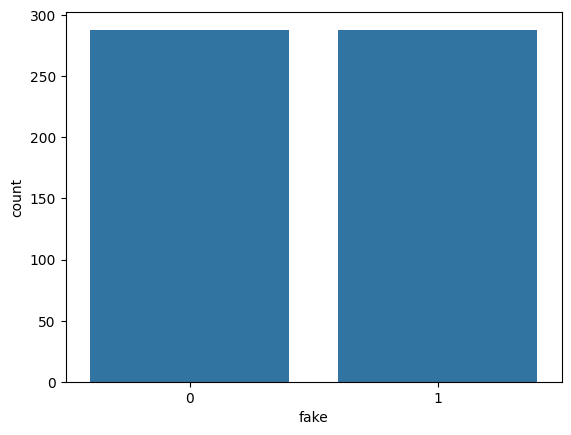

In [ ]:
# Visualize the data


sns.countplot(x=instagram_df_train['fake'])                                        # seaborn.countplot() method is used to Show the counts of observations in each categorial bin using bars.

<Axes: xlabel='private', ylabel='count'>

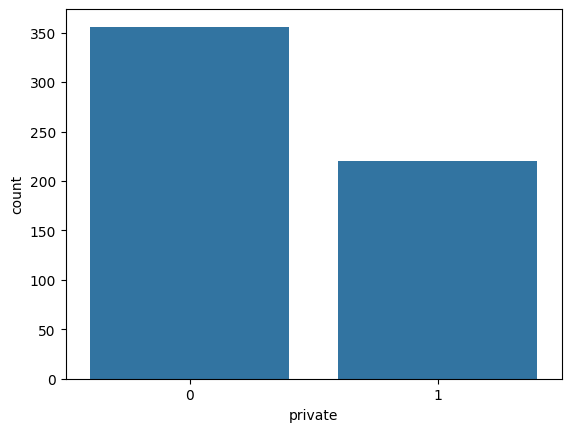

In [ ]:
# Visualize the private column data

sns.countplot(x=instagram_df_train['private'])

<Axes: xlabel='profile pic', ylabel='count'>

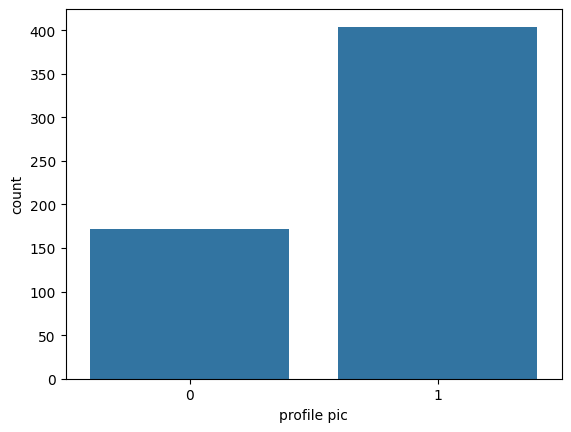

In [ ]:
# Visualize the "profile pic" column data

sns.countplot(x=instagram_df_train['profile pic'])

<ipython-input-26-c98507cd5d13>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(instagram_df_train['nums/length username'])                         # Used for univariant set of observations and visualizes it through a histogram.


<Axes: xlabel='nums/length username', ylabel='Density'>

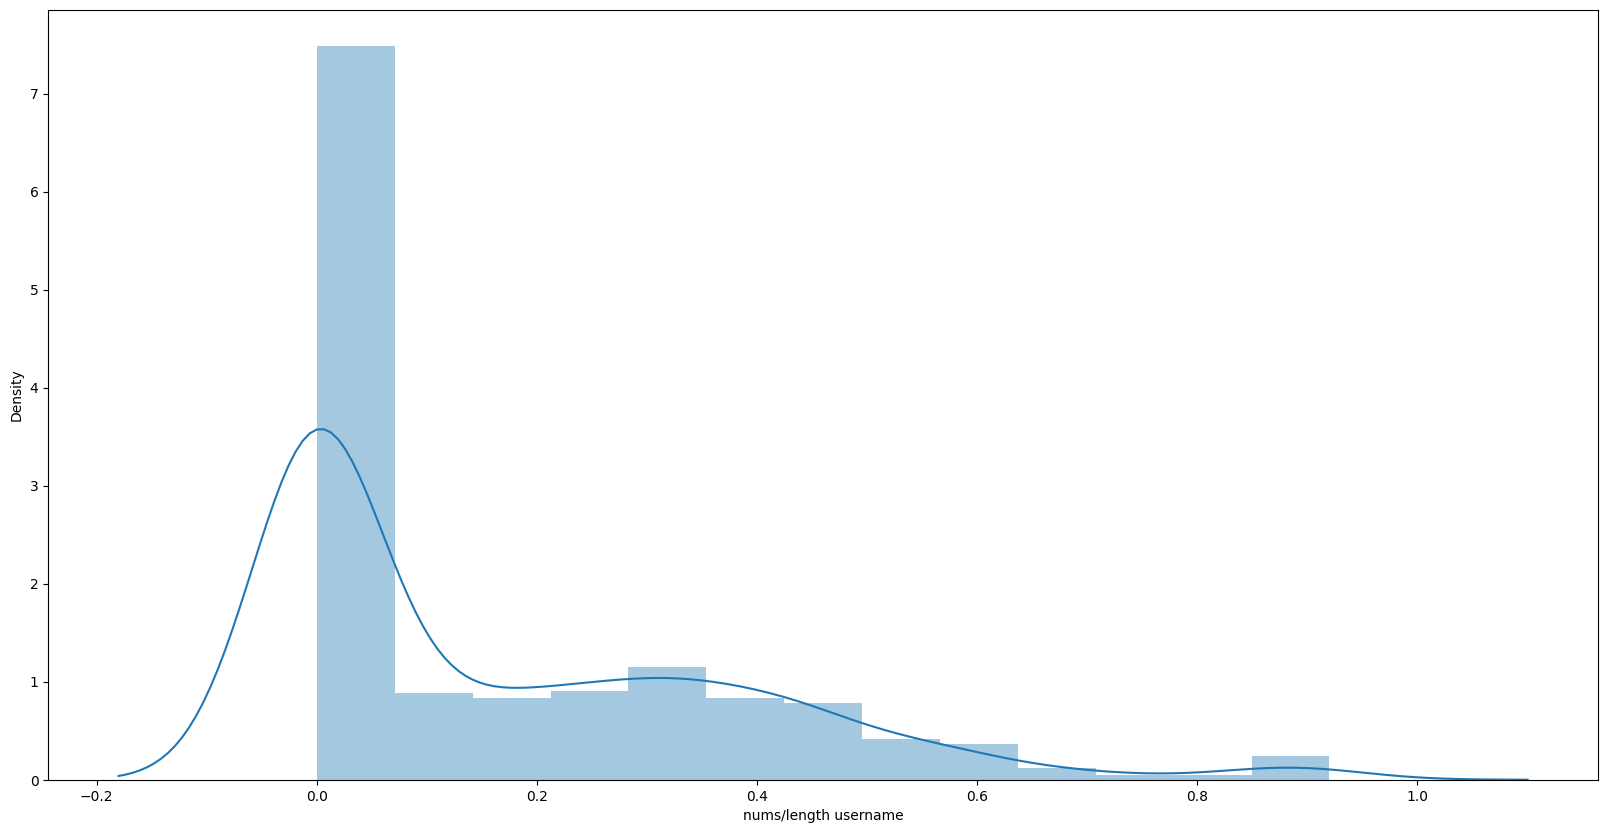

In [ ]:
# Visualize the data

plt.figure(figsize = (20, 10))                                                   # The figure() function in pyplot module of matplotlib liberary is used to create a new figure.
sns.distplot(instagram_df_train['nums/length username'])                         # Used for univariant set of observations and visualizes it through a histogram.


<Figure size 2000x2000 with 0 Axes>

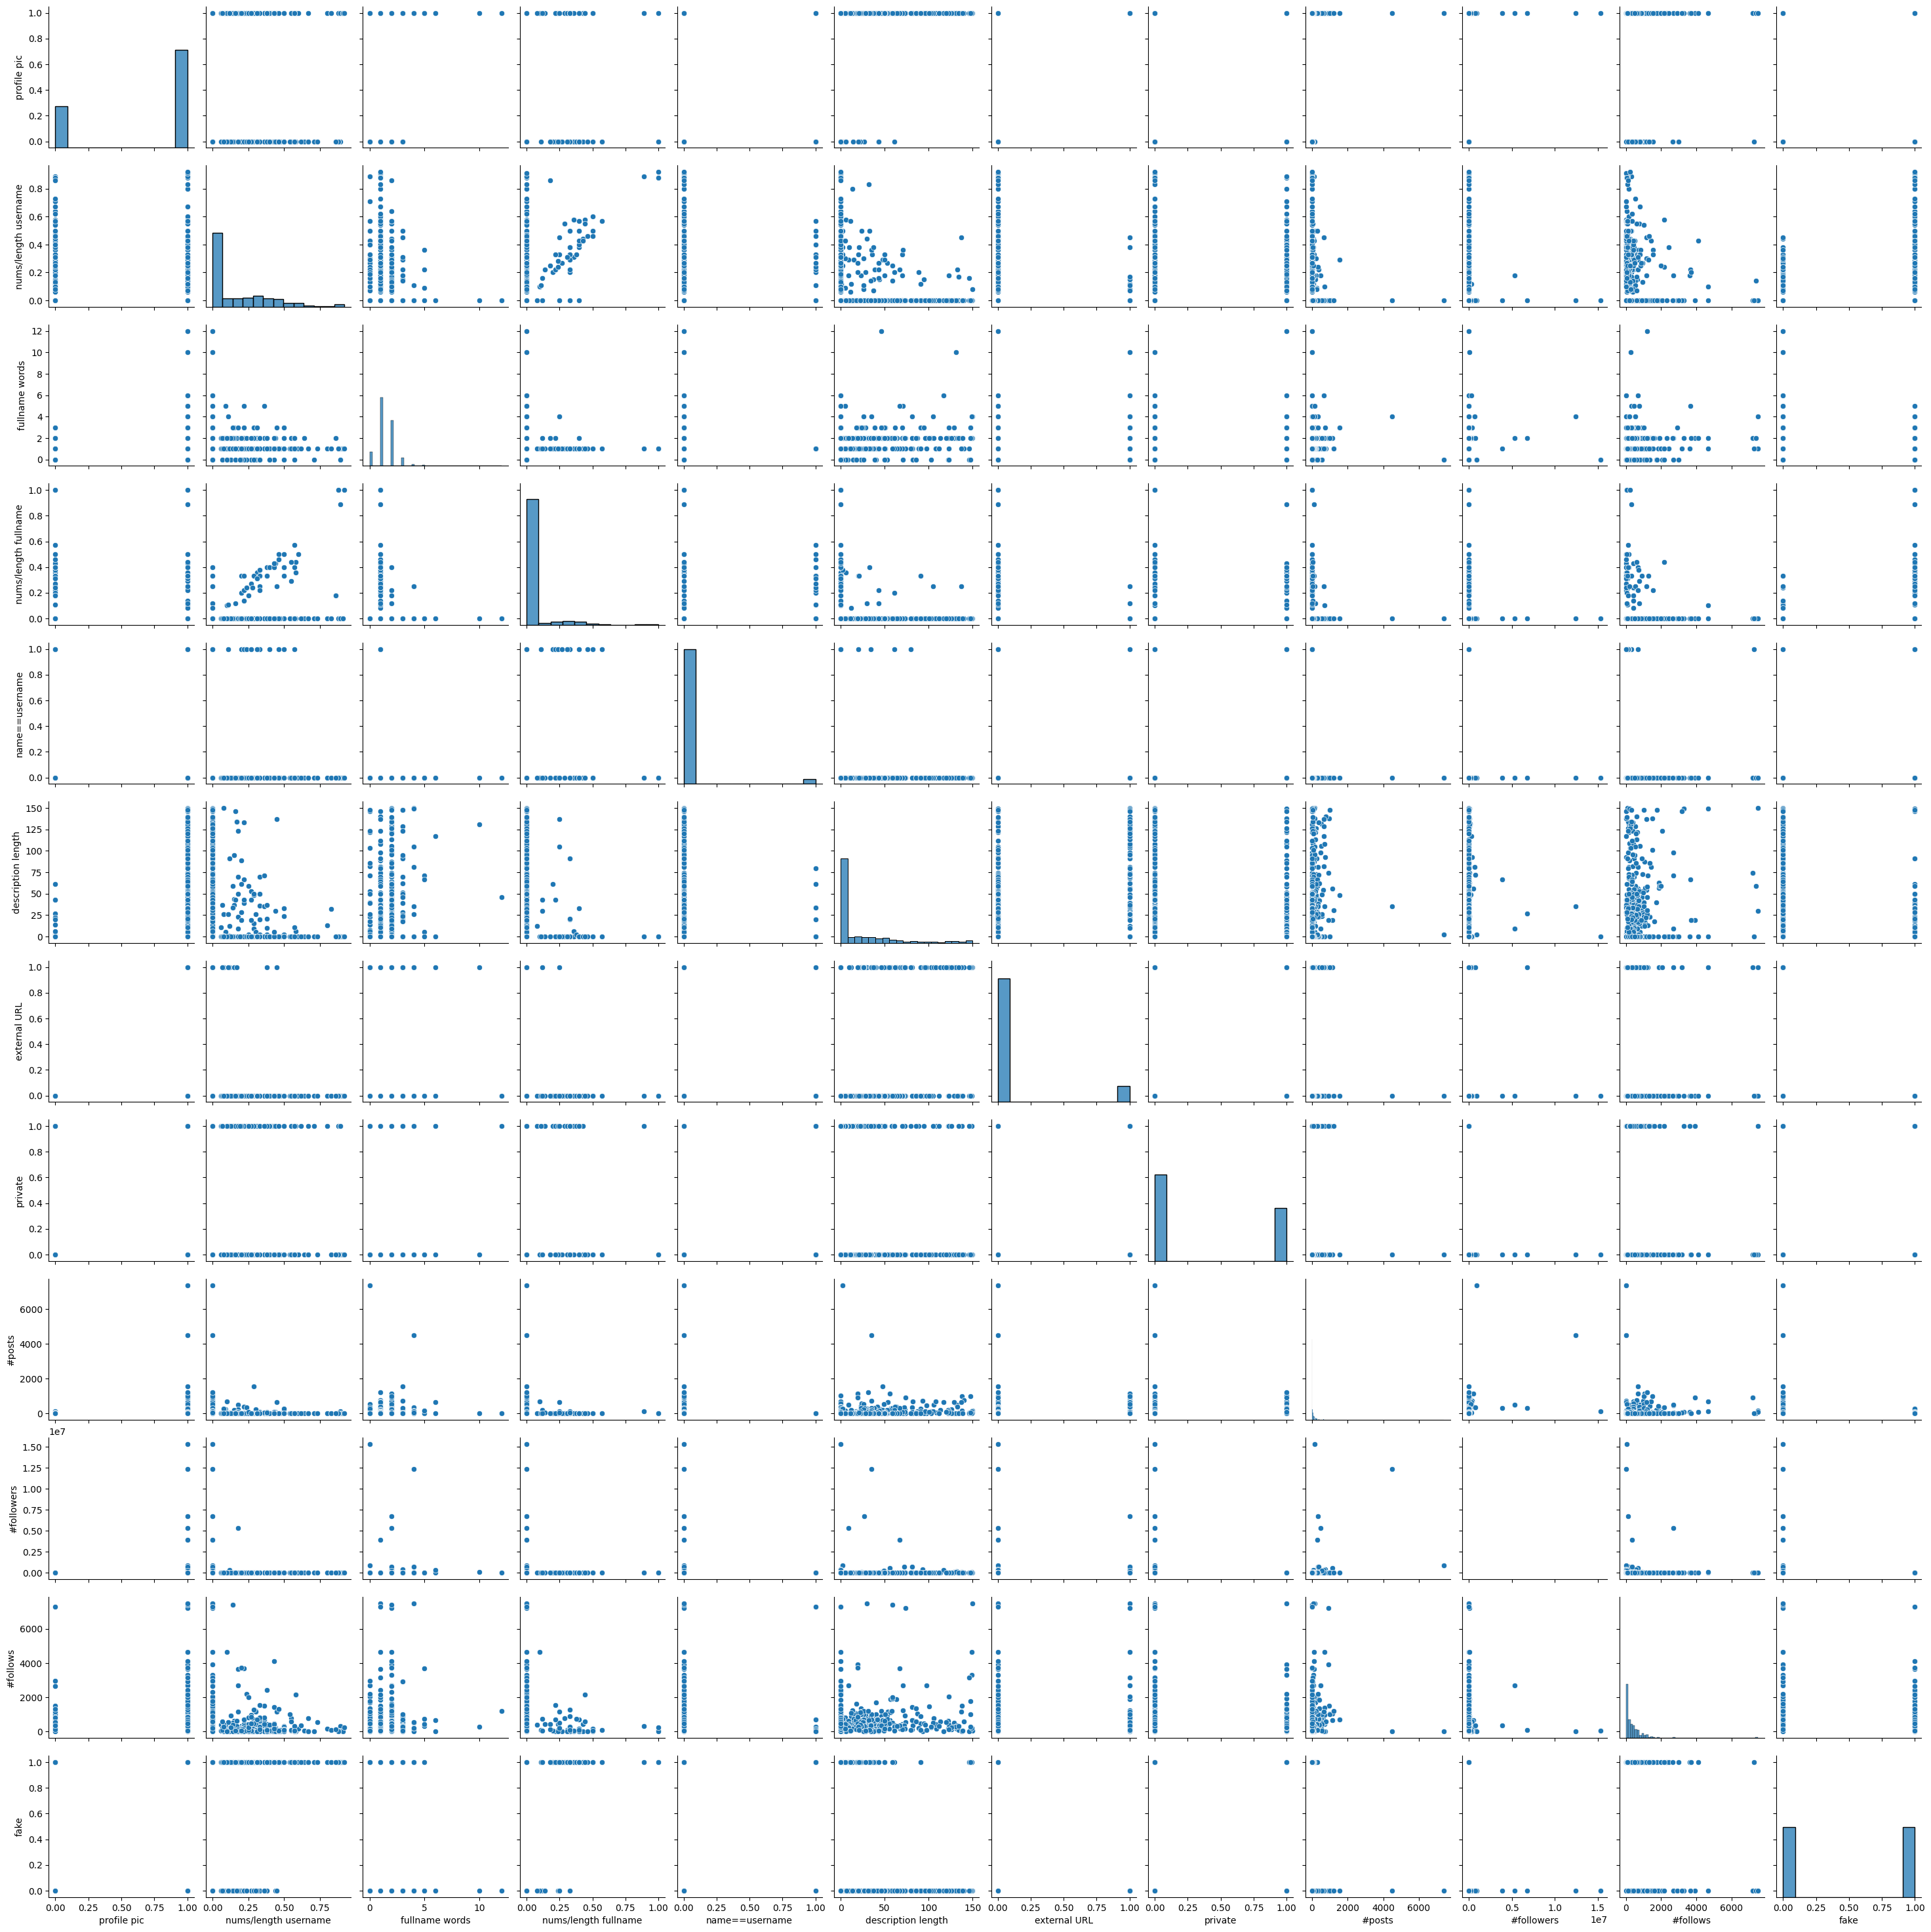

In [ ]:
# Plot pairplot
plt.figure(figsize = (20, 20))
sns.pairplot(instagram_df_train)                                                # Used to plot multiple pairwise bivarient distributions in a dataset.

<Axes: >

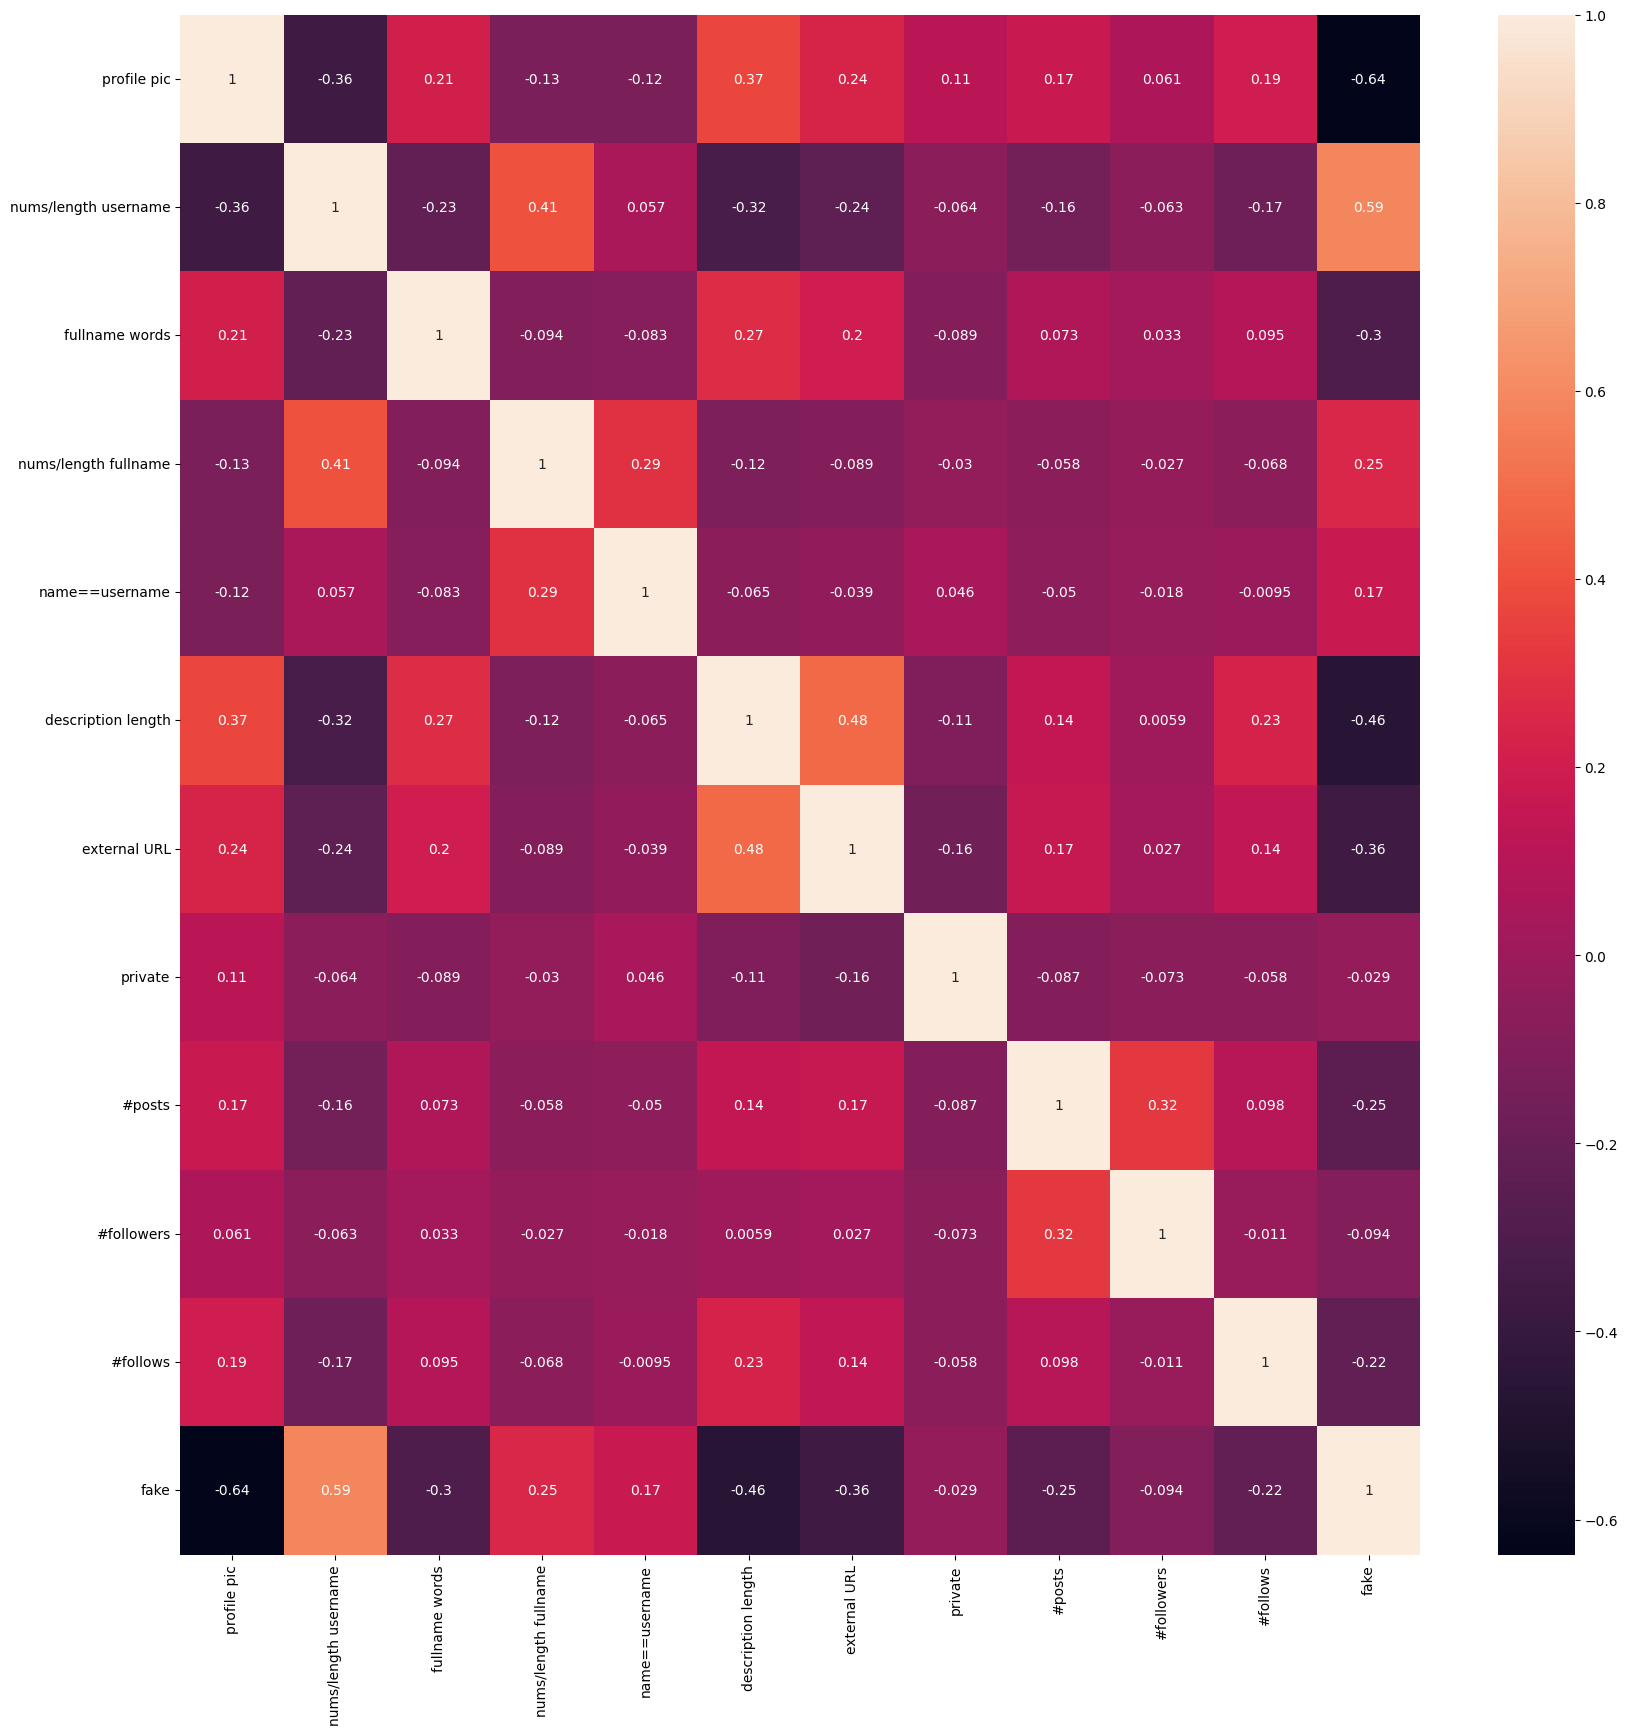

In [ ]:
# Correlation plot
plt.figure(figsize=(20, 20))
cm = instagram_df_train.corr()
ax = plt.subplot()                                                               # subplot() function adds subplot to a current figure at the specified grid position
sns.heatmap(cm, annot = True, ax = ax)                                           # Plot a matrix using hierarchical clustering to arrange the rows and columns

<Axes: xlabel='fake', ylabel='count'>

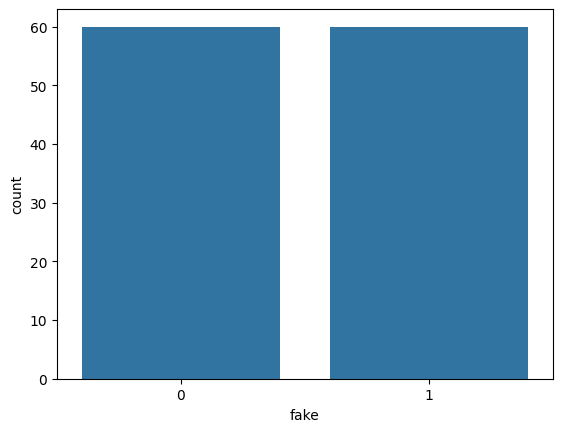

In [ ]:
sns.countplot(x=instagram_df_test['fake'])

<Axes: xlabel='profile pic', ylabel='count'>

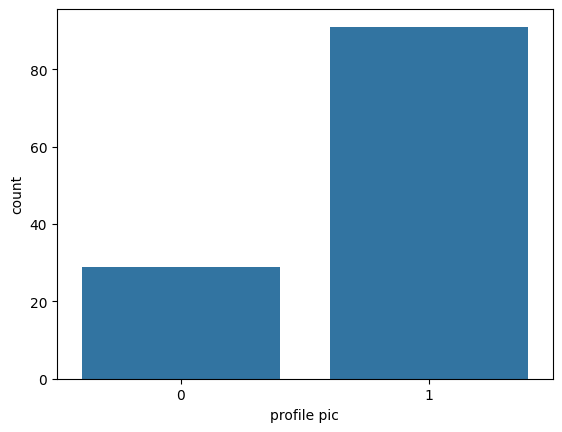

In [ ]:
sns.countplot(x=instagram_df_test['profile pic'])

<Axes: xlabel='private', ylabel='count'>

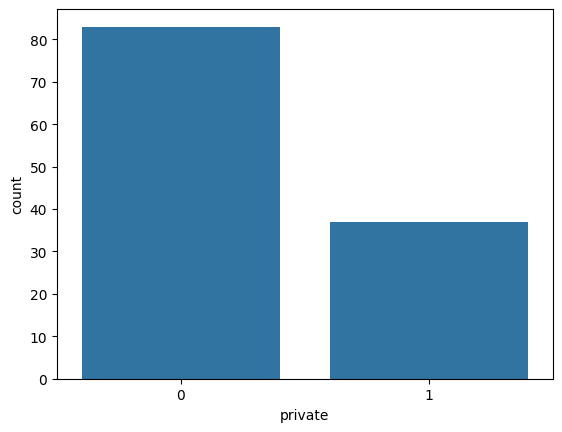

In [ ]:
sns.countplot(x=instagram_df_test['private'])

### PREPARE THE DATA TO FEED THE MODEL

In [ ]:

# Training and testing dataset (inputs)

X_train= instagram_df_train.drop(columns=['fake'])
X_test=  instagram_df_test.drop(columns=['fake'])
X_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [ ]:
X_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356
...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811
116,1,0.40,1,0.00,0,0,0,0,4,150,164
117,1,0.00,2,0.00,0,0,0,0,3,833,3572
118,0,0.17,1,0.00,0,0,0,0,1,219,1695


In [ ]:
# Training and testing dataset (Outputs)


y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']

In [ ]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [ ]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [ ]:
# Scale the data before training the model


from sklearn.preprocessing import StandardScaler, MinMaxScaler                  # Standard Scaler helps to get standardized distribution, with a zero mean and standard deviation of one (unit variance). It standardizes features by subtracting the mean value from the feature and then dividing the result by feature standard deviation.
                                                                                # MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.
scaler_x=StandardScaler()

X_train=scaler_x.fit_transform(X_train)
X_test=scaler_x.fit_transform(X_test)

In [ ]:

y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)               # num_classes=2 represents that we are only going to have binary classification problems i.e 1 or 0.
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

In [ ]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [ ]:
X_train.shape,X_test.shape

((576, 11), (120, 11))

In [ ]:
y_train.shape,y_test.shape

((576, 2), (120, 2))

In [ ]:
print(len(X_train)/(len(X_train)+len(X_test))*100)

82.75862068965517


### BUILD AND TRAIN A SIMPLE DEEP LEARNING MODEL

# New Section

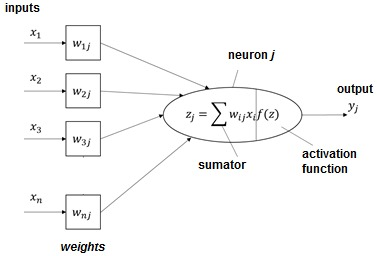

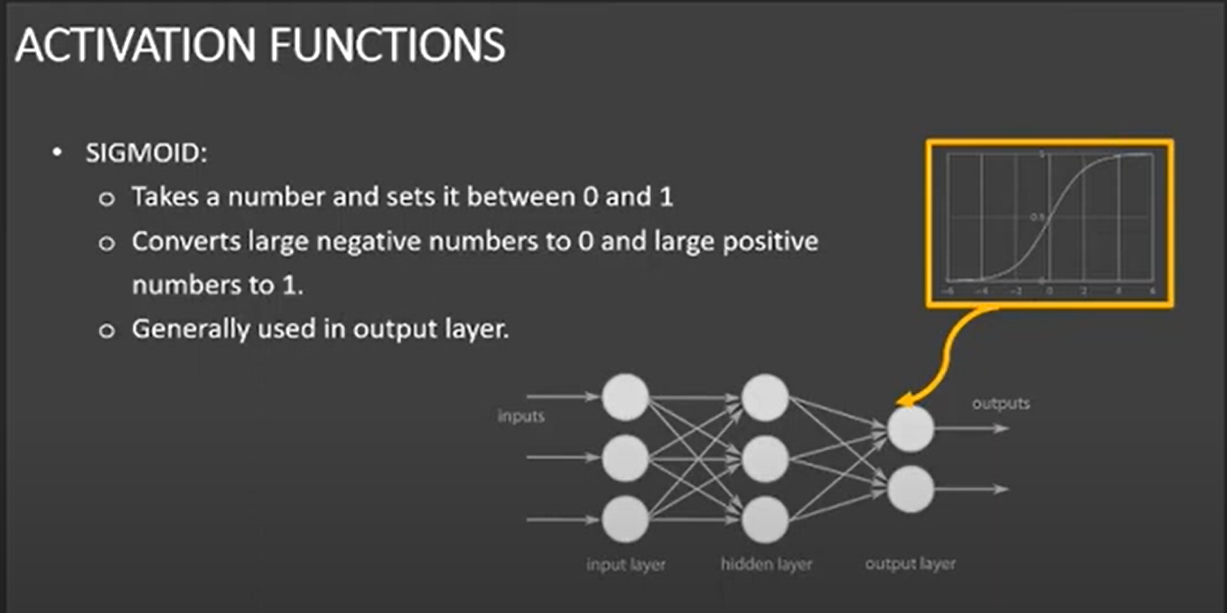

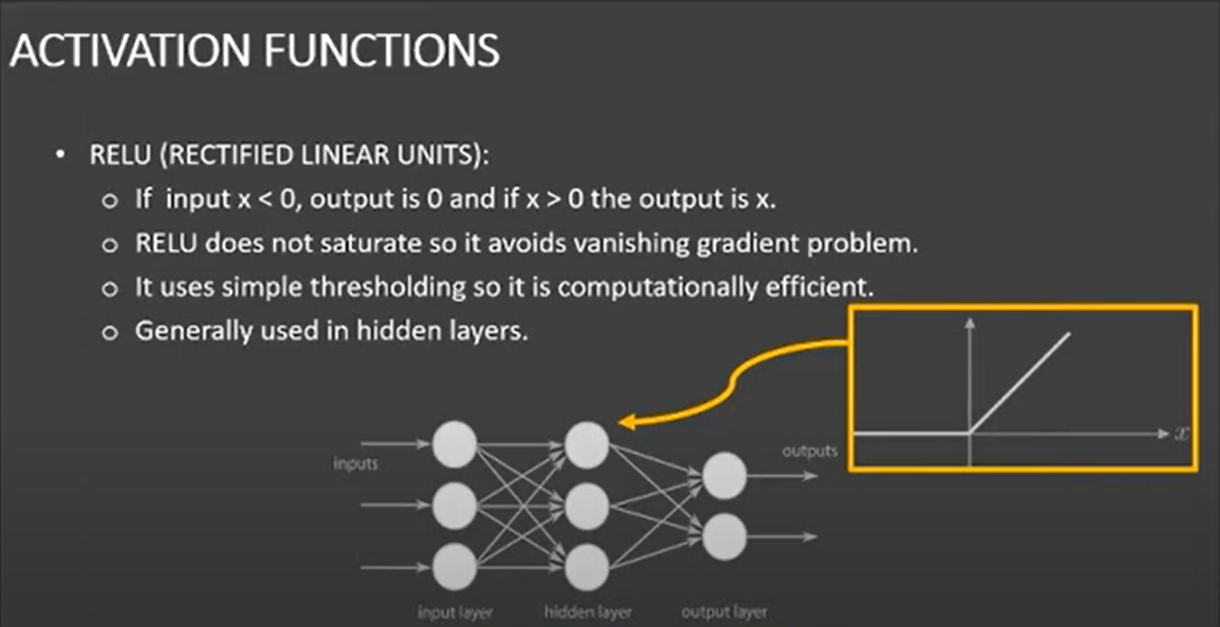

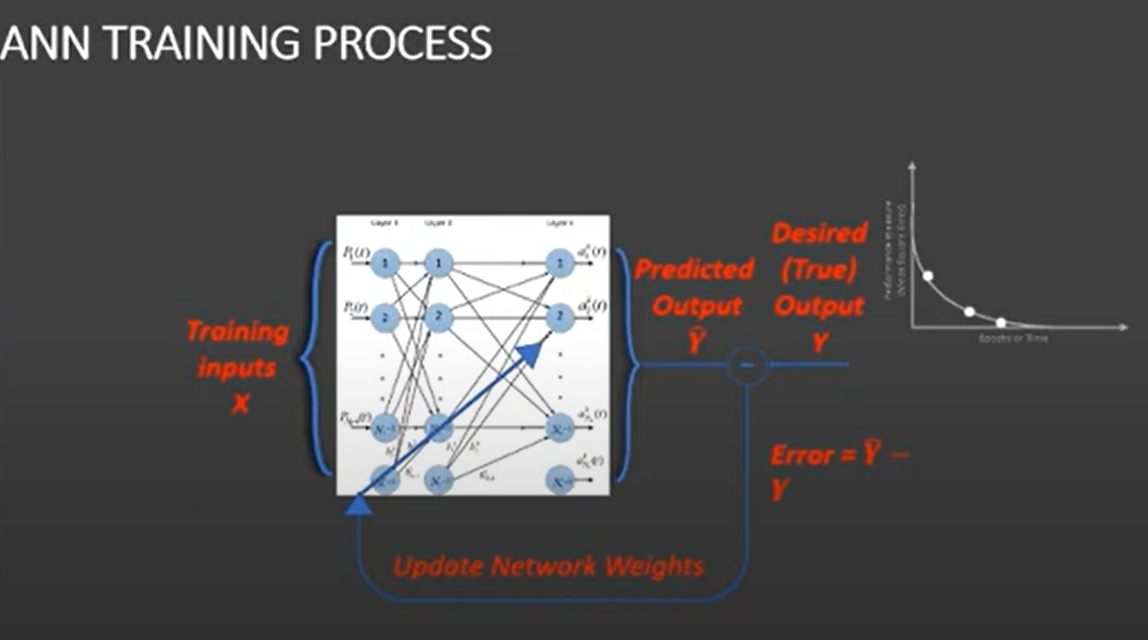

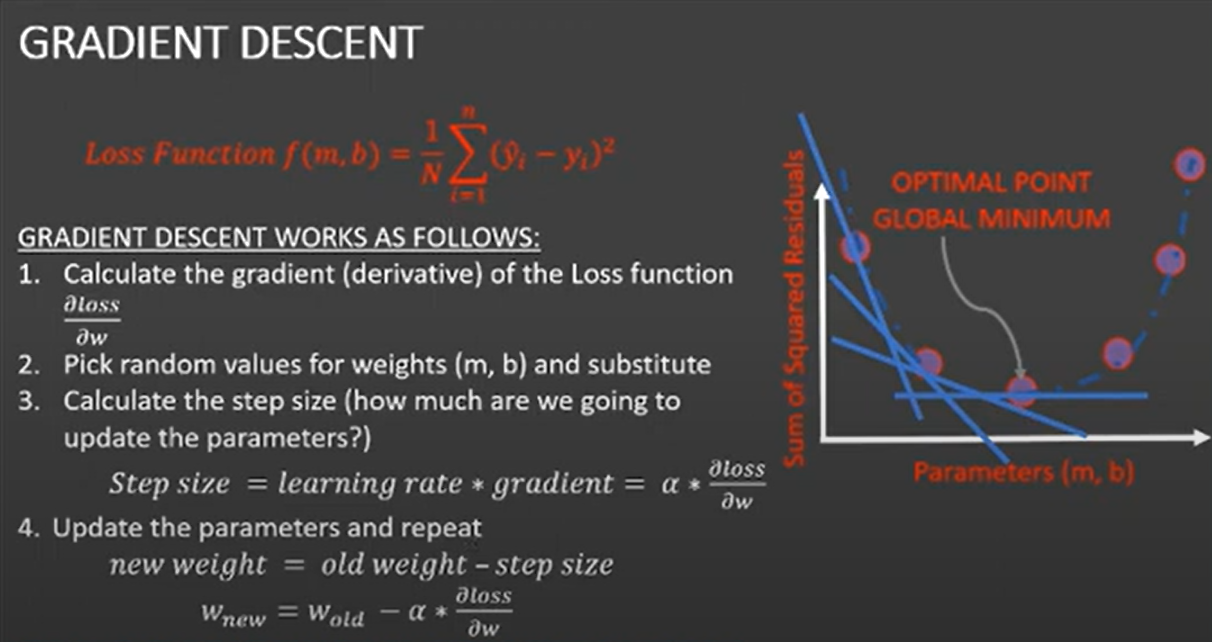

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential                                   # Sequential : Create linear stack of layers.
from tensorflow.keras.layers import Dense, Dropout

model=Sequential()
model.add(Dense(50,input_dim=X_train.shape[1],activation="relu"))                # ReLu is a non-linear activation function that is used in multi-layer neural networks or deep neural networks.
model.add(Dense(150,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(150,activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(50,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(25,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(2,activation="softmax"))                                         # The softmax function takes an input vector x and returns a probability distribution over a set of classes.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                600       
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                7550      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0

In [ ]:
opt=keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
epochs_hist = model.fit(X_train,y_train,epochs=400,verbose=1,validation_split=0.1)  #  Epoch : They allow you to train a model for longer, which may result in improved performance.
                                                                                   #          They make it simple to track your model’s progress during training.
                                                                                   #          They allow you to train a model on a larger dataset even if it doesn’t fit all at once in memory.
                                                                                   #          They make early stopping simple, which is a useful technique for avoiding overfitting.
                                                                                   #          They are used to gather and group performance data relating to the development of the machine learning model in the form of a line plot

Epoch 1/400
17/17 [==============================] - 2s 29ms/step - loss: 0.4743 - accuracy: 0.8012 - val_loss: 0.3244 - val_accuracy: 0.8966
Epoch 2/400
17/17 [==============================] - 0s 7ms/step - loss: 0.3325 - accuracy: 0.8919 - val_loss: 0.2807 - val_accuracy: 0.8793
Epoch 3/400
17/17 [==============================] - 0s 8ms/step - loss: 0.2686 - accuracy: 0.9073 - val_loss: 0.2194 - val_accuracy: 0.8966
Epoch 4/400
17/17 [==============================] - 0s 9ms/step - loss: 0.2518 - accuracy: 0.8996 - val_loss: 0.2648 - val_accuracy: 0.8793
Epoch 5/400
17/17 [==============================] - 0s 8ms/step - loss: 0.2585 - accuracy: 0.9112 - val_loss: 0.2150 - val_accuracy: 0.8793
Epoch 6/400
17/17 [==============================] - 0s 9ms/step - loss: 0.2565 - accuracy: 0.9093 - val_loss: 0.1605 - val_accuracy: 0.9138
Epoch 7/400
17/17 [==============================] - 0s 8ms/step - loss: 0.2256 - accuracy: 0.9093 - val_loss: 0.3348 - val_accuracy: 0.8793
Epoch 8/400


### ASSESS THE PERORMANCE OF TRAINED MODEL

In [ ]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


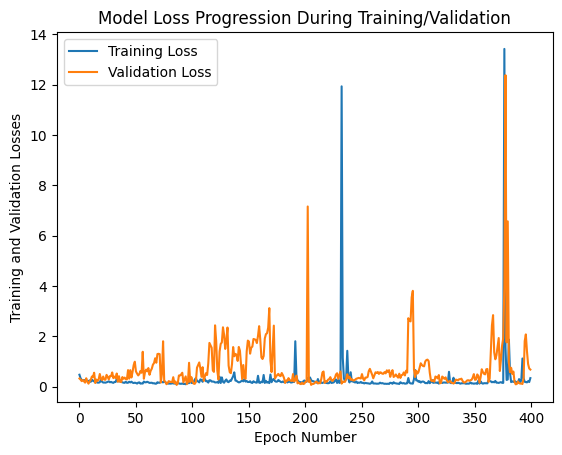

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


In [ ]:
predicted=model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in y_test:
    test.append(np.argmax(i))

ACCURACY, RECALL, F1 SCORE, SUPPORT OF MODEL

In [ ]:
print(classification_report(test,predicted_value))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88        60
           1       0.84      0.97      0.90        60

    accuracy                           0.89       120
   macro avg       0.90      0.89      0.89       120
weighted avg       0.90      0.89      0.89       120



CONFUSION MATRIX

<Axes: >

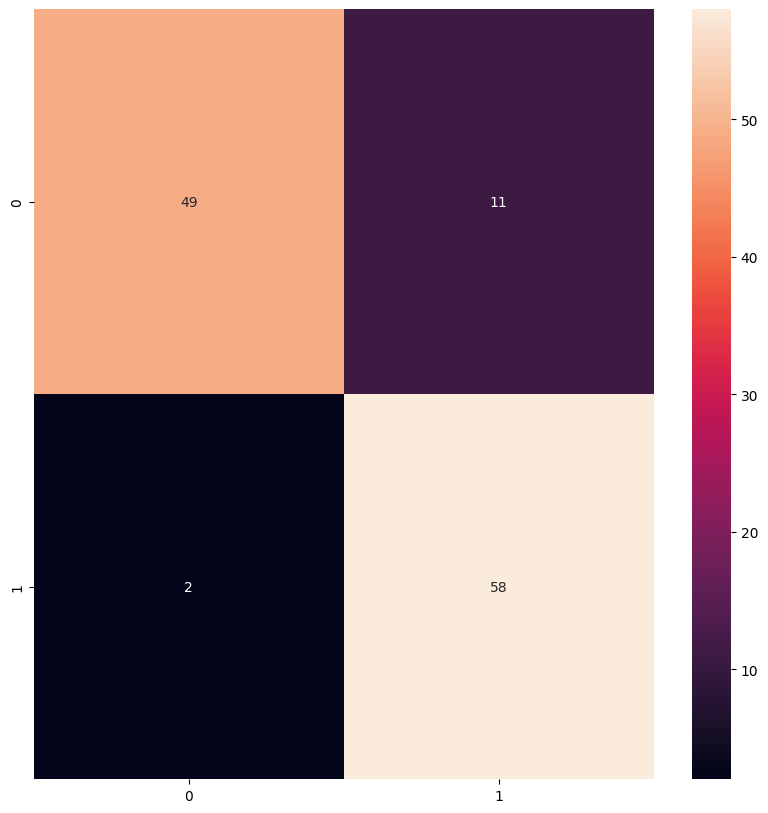

In [ ]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(test,predicted_value)
sns.heatmap(cm,annot=True)

In [ ]:
z = pd.read_excel('z.xlsx')
z.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,1.0,1.00,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1.0,0.33,1.0,0.33,1.0,30.0,0.0,1.0,35.0,488.0,604.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,0.33,1.0,0.33,1.0,30.0,0.0,1.0,35.0,488.0,604.0,0.0
25%,1.0,0.33,1.0,0.33,1.0,30.0,0.0,1.0,35.0,488.0,604.0,0.0
50%,1.0,0.33,1.0,0.33,1.0,30.0,0.0,1.0,35.0,488.0,604.0,0.0
75%,1.0,0.33,1.0,0.33,1.0,30.0,0.0,1.0,35.0,488.0,604.0,0.0
max,1.0,0.33,1.0,0.33,1.0,30.0,0.0,1.0,35.0,488.0,604.0,0.0


In [ ]:
z_test=z.drop(columns=['fake'])
z_test.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
count,1.0,1.00,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1.0,0.33,1.0,0.33,1.0,30.0,0.0,1.0,35.0,488.0,604.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,0.33,1.0,0.33,1.0,30.0,0.0,1.0,35.0,488.0,604.0
25%,1.0,0.33,1.0,0.33,1.0,30.0,0.0,1.0,35.0,488.0,604.0
50%,1.0,0.33,1.0,0.33,1.0,30.0,0.0,1.0,35.0,488.0,604.0
75%,1.0,0.33,1.0,0.33,1.0,30.0,0.0,1.0,35.0,488.0,604.0
max,1.0,0.33,1.0,0.33,1.0,30.0,0.0,1.0,35.0,488.0,604.0


In [ ]:
z_predicted=model.predict(z_test)

1/1 [==============================] - 0s 24ms/step


In [ ]:
print(z_predicted)

[[1. 0.]]
